In [1]:
#This uses code from https://github.com/dms-vep/dms-vep-pipeline, please refer to this repository for more detailed information.

import sys

import Bio.SeqIO

import alignparse.utils

import dms_variants.codonvarianttable

import pandas as pd
pd.set_option('display.max_rows',10)

import seaborn as sns

import scipy as sp
import numpy as np

import matplotlib.pyplot as plt

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [2]:
background='SN89'
geneseq='GCCCCACTACAATTGGGTAATTGCAGCATTGCCGGATGGATCTTAGGAAACCCAGAATGCGAATCACTGTTTTCTAAGGAATCATGGTCCTACATTGCAGAAACACCAAACTCCGAGAATGGAACATGTTACCCAGGGTATTTCGCCGACTATGAGGAACTGAGGGAGCAATTGAGTTCAGTATCATCATTCGAGAGATTCGAAATATTCCCCAAAGAAAGCTCATGGCCCAACCACACCGTAACCAAAGGAGTAACGGCAGCATGCTCCCATAATGGGAAAAGCAGTTTTTACAGAAATTTGCTATGGCTGACGGAGAAGAATGGCTTGTACCCAAATCTGAGCAAGTCCTATGTAAACAACAAAGAGAAAGAAGTCCTTGTACTATGGGGTGTTCATCACCCGTCAAACATAGGGGACCAAAGGGCCATCTATCATACAGAAAATGCTTATGTGTCTGTAGTGTCTTCACATTATAGCAGGAGATTCACCCCAGAAATAGCAAAAAGACCCAAAGTAAGAGGTCAAGAAGGAAGAATTAACTACTACTGGACTCTGCTGGAACCCGGGGACACAATAATATTTGAGGCAAATGGAAATCTAATAGCGCCATGGTATGCTTTCGCACTGAGTAGAGGCTTTGGGTCAGGAATCATCACCTCAAACGCATCAATGGATGAATGTGACGCGAAGTGTCAAACACCCCAGGGAGCTATAAACAGTAGTCTTCCTTTCCAGAATGTACACCCAGTCACAATAGGAGAGTGTCCAAAGTATGTCAGGAGTACAAAATTAAGGATGGTTACAGGACTAAGGAACATCCCATCCGTTCAATCCAGAGGTTTGTTTGGAGCCATTGCCGGTTTCATTGAAGGGGGGTGGACTGGAATGATAGATGGATGGTATGGTTATCATCATCAAAATGAACAAGGATCTGGCTATGCTGCGGATCAAAAAAGCACACAAAATGCCATTAACGGGATTACAAACAAGGTGAATTCTGTAATCGAGAAAATGAACACTCAATTCACAGCTGTGGGCAAAGAATTCAACAAATTAGAAAGAAGGATGGAAAACTTAAATAAAAAAGTTGATGATGGATTTCTGGACATTTGGACATATAATGCAGAATTGTTGGTTCTACTGGAAAATGAAAGGACTTTGGATTTTCATGACTCAAATGTGAAGAATCTGTATGAGAAAGTAAAAAGCCAATTAAAGAATAATGCCAAAGAAATAGGAAACGGGTGTTTTGAATTCTACCACAAGTGTAACAATGAATGCATGGAAAGTGTGAAAAATGGAACTTATGACTATCCAAAATATTCCGAGGAATCAAAGTTAAACAGGGAAAAAATTGATGGAGTGAAATTGGAATCAATGGGAGTCTATCAGATTCTGGCGATCTACTCAACTGTCGCCAGTTCACTGGTCCTGCTCGTGTCACTGGGAGCCATCAGCTTCTGGATGTGCAGCAACGGCAGCCTCCAGTGTAGGATTTGCATTTAA'

In [3]:
variants = dms_variants.codonvarianttable.CodonVariantTable(
    barcode_variant_file=f'data/codon_variant_tables/codon_variant_table_{background}.csv',
    geneseq=geneseq,
    allowgaps=True,
    substitutions_are_codon=True,
    primary_target=background,
    substitutions_col="codon_substitutions",
)

In [4]:
variants_df=variants.barcode_variant_df
variants_df

,target,library,barcode,variant_call_support,codon_substitutions,aa_substitutions,n_codon_substitutions,n_aa_substitutions
0,SN89,rep1,ACTTTTCGTTGTAGCTGACTTCTATTTA,6,GGC109AAA,G109K,1,1
1,SN89,rep1,GCTTTTCGTTGTAGCTTGCATCCTAGAT,6,GGC109TGC,G109C,1,1
2,SN89,rep1,TATTAACTGAGCAGCTCTCGTCACTTCA,3,AAT113CAA,N113Q,1,1
3,SN89,rep1,TATTAGGAAACAAGCTTATATGATTATG,6,CCG135ATG,P135M,1,1
4,SN89,rep1,TATTAGTCAGTTAGCTGATTATCTCCAC,6,AGC95CAA,S95Q,1,1
...,...,...,...,...,...,...,...,...
123755,SN89,rep2,TGTTCTTGGTTGAGCTATTCACCGTAGC,6,AAA83CCA,K83P,1,1
123756,SN89,rep2,TGTTGTCGGGAAAGCTGGCGGCCTTGAC,6,GTA154AAA,V154K,1,1
123757,SN89,rep2,TGTTTACGACCGAGCTTAAATGCGGGAT,6,GAG106---,E106-,1,1
123758,SN89,rep2,TGTTTTGCTAGGAGCTCGACACTCGTCA,6,TGG29ATG,W29M,1,1


In [5]:
replicate_list=['rep1','rep2']
variant_counts=pd.DataFrame()
for rep in replicate_list:
    replicate = rep[-1:]
    variant_counts = pd.concat(
        [   variant_counts,
            pd.read_csv(f'data/counts_files/{background}_R{replicate}_Plasmid.csv', na_filter=False).assign(
                library=f'{rep}',
                sample='Plasmid',
            ),
            pd.read_csv(f'data/counts_files/{background}_R{replicate}_P1.csv', na_filter=False).assign(
                library=f'{rep}',
                sample='P1',
            ),
        ]
    )
assert variant_counts.notnull().all().all()

In [6]:
variant_counts

,Unnamed: 0,barcode,count,codon_substitutions,aa_substitutions,variant_call_support,library,sample
0,0,ACTTTTCGTTGTAGCTGACTTCTATTTA,225,GGC109AAA,G109K,6,rep1,Plasmid
1,1,GCTTTTCGTTGTAGCTTGCATCCTAGAT,397,GGC109TGC,G109C,6,rep1,Plasmid
2,2,TATTAACTGAGCAGCTCTCGTCACTTCA,140,AAT113CAA,N113Q,3,rep1,Plasmid
3,3,TATTAGGAAACAAGCTTATATGATTATG,128,CCG135ATG,P135M,6,rep1,Plasmid
4,4,TATTAGTCAGTTAGCTGATTATCTCCAC,348,AGC95CAA,S95Q,6,rep1,Plasmid
...,...,...,...,...,...,...,...,...
25308,25308,TCTTTTCGTTGTAGCTTGGGCAAGAAAC,102,GGC109AAT,G109N,2,rep2,P1
25309,25309,TCTTTTCGTTGTAGCTTTATAAAGTGTC,9,GGC109TTC,G109F,3,rep2,P1
25310,25310,TCTTTTGCATGTAGCTTTCACCTGGTTC,4,TTC48GCA,F48A,1,rep2,P1
25311,25311,TCTTTTTACGTCAGCTCGTCCTAAAAAC,776,AAG116ATG,K116M,1,rep2,P1


In [7]:
min_wt_count=1000
min_wt_frac=0.001

wt_fracs = (
    variant_counts.assign(
        wt_aa_sequence=lambda x: (x["aa_substitutions"] == "").map(
            {True: "wt", False: "not_wt"}
        )
    )
    .groupby(["library", "sample", "wt_aa_sequence"], as_index=False)
    .aggregate({"count": "sum"})
    .pivot_table(index=["library", "sample"], values="count", columns="wt_aa_sequence")
    .assign(frac_wt=lambda x: x["wt"] / x["not_wt"])
    .assign(
        adequate_wt_counts=lambda x: x["wt"] >= min_wt_count,
        adequate_wt_frac=lambda x: x["frac_wt"] >= min_wt_frac,
        adequate_wt=lambda x: x["adequate_wt_counts"] | x["adequate_wt_frac"],
    )
)
if not wt_fracs["adequate_wt"].all():
    raise ValueError(f"Inadequate wildtype counts or fraction:\n{str(wt_fracs)}")

variants.add_sample_counts_df(variant_counts)

In [8]:
func_scores = variants.func_scores(
    preselection='Plasmid',
    pseudocount=0.5,
    libraries='all',
    by='aa_substitutions',
    syn_as_wt=False
)

In [9]:
renumber = alignparse.utils.MutationRenumber(
    number_mapping=pd.read_csv(f'data/renumbering_files/{background}_renumber.csv'),
    old_num_col="sequential_site",
    new_num_col="reference_site",
    wt_nt_col=None,
    allow_letter_suffixed_numbers=True,
)

In [10]:
func_scores = (
    func_scores.query(f"target == '{background}'")
    .drop(columns=["target"])
    .rename(columns={"aa_substitutions": "aa_substitutions_sequential"})
    .assign(
        aa_substitutions_reference=lambda x: (
            x["aa_substitutions_sequential"].apply(
                renumber.renumber_muts,
                allow_gaps=True,
                allow_stop=True,
            )
        ),
    )
)

In [11]:
func_scores.query("library == 'rep1' ").to_csv(f'data/func_scores/{background}_R1.csv')
func_scores.query("library == 'rep2' ").to_csv(f'data/func_scores/{background}_R2.csv')
func_scores.query("library == 'all libraries' ").to_csv(f'data/func_scores/{background}_all.csv')

In [12]:
df=func_scores.pivot_table(columns='library',index='aa_substitutions_reference',values='func_score').dropna().reset_index()
df

library,aa_substitutions_reference,rep1,rep2,all libraries
0,,0.269785,-0.160630,0.071686
1,A-12C,-11.498553,-10.255834,-10.655876
2,A-12D,-6.569215,-4.743919,-5.154894
3,A-12E,-5.492973,-6.288579,-5.883942
4,A-12F,-2.947350,-10.340962,-4.019416
...,...,...,...,...
3893,Y98R,-9.273088,-6.296408,-7.291070
3894,Y98S,-9.036444,-8.885026,-9.017913
3895,Y98T,-9.637941,-9.563992,-9.604925
3896,Y98V,-9.573669,-7.648065,-8.204199


0.6048348183434048 0.0 3898


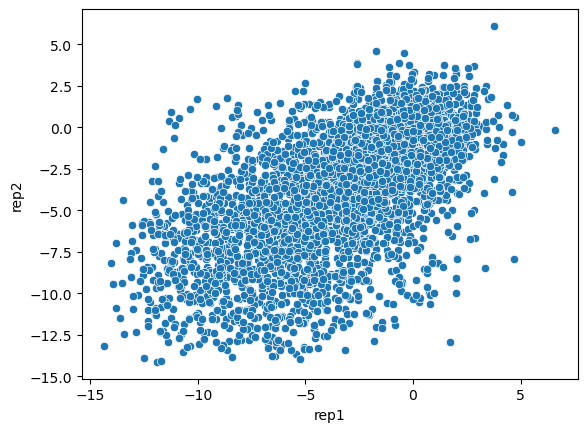

In [13]:
sns.scatterplot(df,x='rep1',y='rep2')
r, p = sp.stats.pearsonr(x=df['rep1'], y=df['rep2'])
print(r,p,len(df))